In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import warnings
import re
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
df = pd.read_csv("genes/combined-gene-on-off.csv")
df.head(1)

,gene,off-period,on-period,off-mean,on-mean,K-off-rate,K-on-rate,off-median,on-median,off-period-counts,on-period-counts,TATA_group,inr_group,chr_x,strand_x,TSS,geneID,TATA +,YY1 +,SP +,SP -,ETS +,ETS -,NFY +,NFY -,CREB +,CREB -,NRF1 +,NRF1 -,ZNF143 +,ZNF143 -,U1 snRNP +,chr_y,start,end,strand_y,gene_id,transcript_id,distance2tss,celltype,cluster,gene_type,comment
0,LUZP1,"[213, 55, 11, 40]","[7, 7, 2]",79.75,5.333333,0.1875,0.012539,47.5,7.0,4,3,without_TATA,without_inr,chr1,-,23178121.0,ENSG00000169641.9,0.009,0.011,-0.126,-0.16,-0.028,-0.07,0.045,0.065,0.498,0.435,-0.004,0.001,-0.001,-0.067,0.186,chr1,23084023.0,23177808.0,-,ENSG00000169641,NaN,313.0,HBEC,cluster0,simple,NaN


In [59]:
df.shape

(95, 43)

In [60]:
df.head(1)

,gene,off-period,on-period,off-mean,on-mean,K-off-rate,K-on-rate,off-median,on-median,off-period-counts,on-period-counts,TATA_group,inr_group,chr_x,strand_x,TSS,geneID,TATA +,YY1 +,SP +,SP -,ETS +,ETS -,NFY +,NFY -,CREB +,CREB -,NRF1 +,NRF1 -,ZNF143 +,ZNF143 -,U1 snRNP +,chr_y,start,end,strand_y,gene_id,transcript_id,distance2tss,celltype,cluster,gene_type,comment
0,LUZP1,"[213, 55, 11, 40]","[7, 7, 2]",79.75,5.333333,0.1875,0.012539,47.5,7.0,4,3,without_TATA,without_inr,chr1,-,23178121.0,ENSG00000169641.9,0.009,0.011,-0.126,-0.16,-0.028,-0.07,0.045,0.065,0.498,0.435,-0.004,0.001,-0.001,-0.067,0.186,chr1,23084023.0,23177808.0,-,ENSG00000169641,NaN,313.0,HBEC,cluster0,simple,NaN


In [66]:
data[data.celltype=="H9D3"].cluster.value_counts()

cluster1    23
cluster0     3
cluster3     2
Name: cluster, dtype: int64

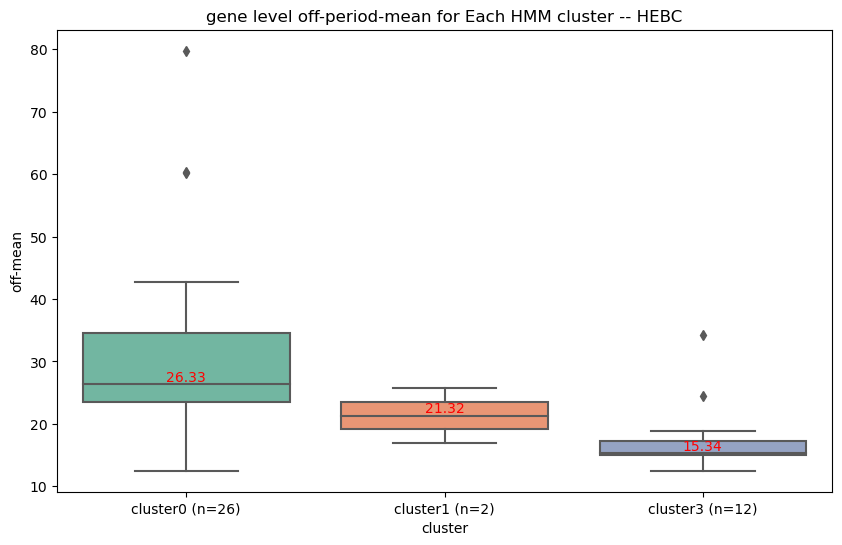

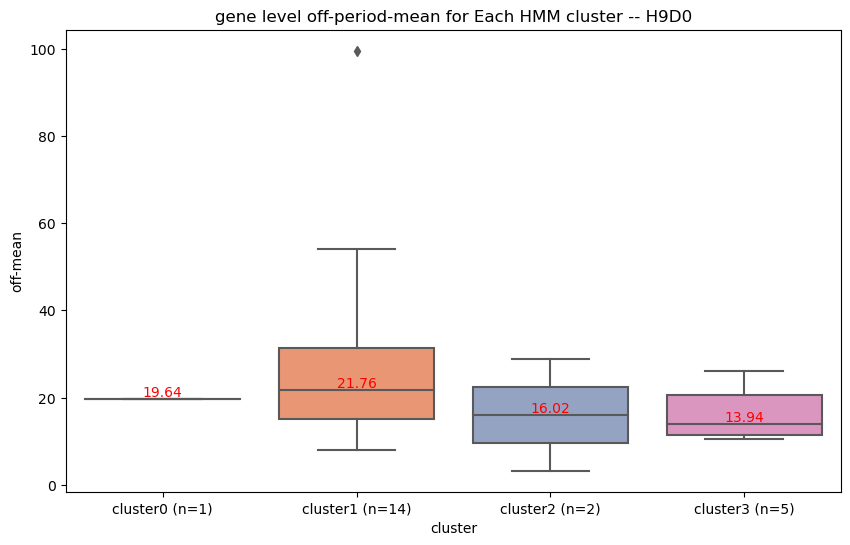

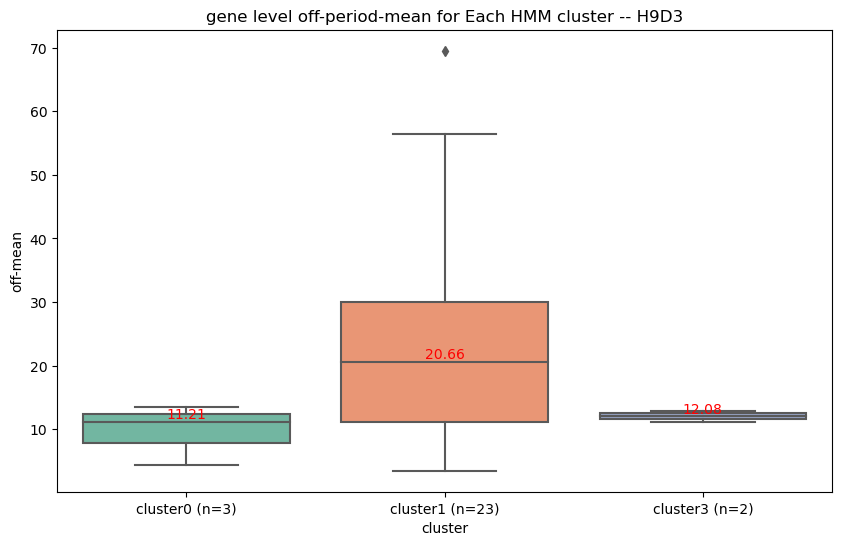

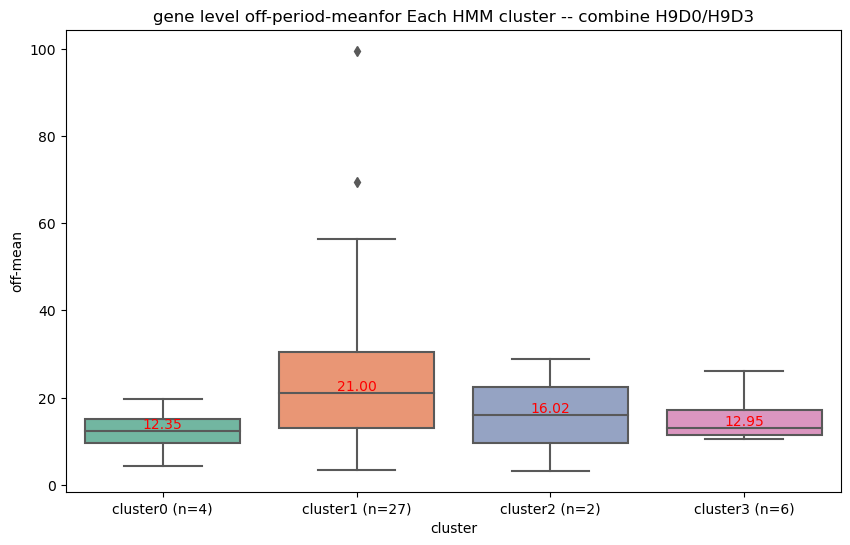

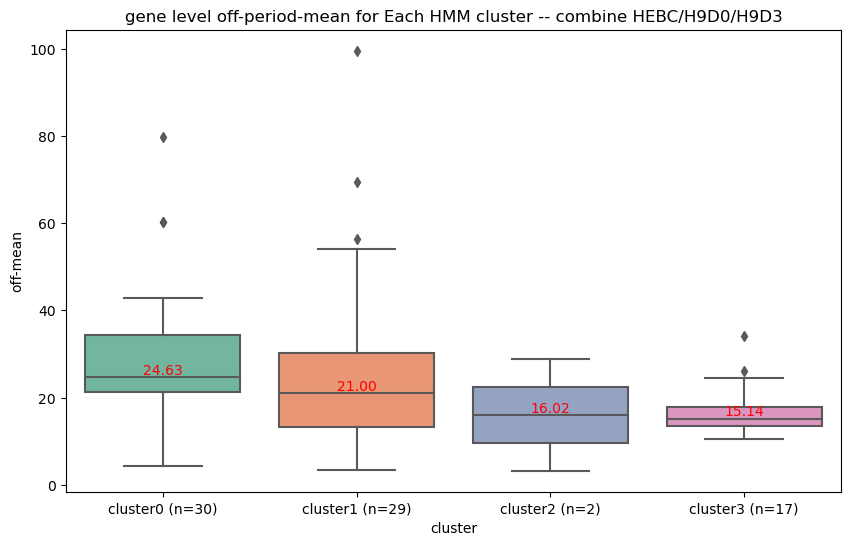

In [67]:
def plot_cluster(data,  title):

    col = 'off-mean'
    if title in{ "gene level off-period-mean for Each HMM cluster -- HEBC",
               'gene level off-period-mean for Each HMM cluster -- H9D3'}:
        order = ['cluster0', 'cluster1','cluster3']
    else:
        order = ['cluster0', 'cluster1', 'cluster2', 'cluster3']
    
#     plt.figure(figsize=(10, 6))
#     sns.violinplot(x="cluster", y=col, data=data, palette="Set2", order=order)
#     sns.stripplot(x="cluster", y=col, data=data, color='black', size=3, jitter=True, order=order)

    
#     plt.title(title)
#     plt.ylabel(col)
#     plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="cluster", y=col, data=data, palette="Set2", order=order)
    plt.title(title )
    plt.ylabel(col);
    mean_values = data.groupby('cluster')[col].median()
    gene_counts = data.groupby('cluster')['gene'].nunique()
    new_labels = [f'{o} (n={gene_counts.get(o, 0)})' for o in order]
    plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
    for i, label in enumerate(order):
        plt.text(i, mean_values[label], f'{mean_values[label]:.2f}', ha='center', va='bottom', color='red')

    # d1 = data[data['cluster'] == 'cluster0'][col]
    # d2 = data[data['cluster'] == 'cluster3'][col]
    # stat, p = mannwhitneyu(d1, d2)
    # # Annotate plot with the significance level
    # x1, x2 = 0, 2  # x coordinates for the two categories you're comparing
    # y, h, color = data[col].max() , 1, 'k'  # y position and height for the line, and color
    # plt.plot([x1, x2], [y, y], lw=1.5, c=color)
    # plt.text((x1+x2)*.5, y, f'p = {p:.3e}', ha='center', va='bottom', color=color)

    plt.show()
    
data = df
plot_cluster(data[data.celltype=="HBEC"], f'gene level off-period-mean for Each HMM cluster -- HEBC')
plot_cluster(data[data.celltype=="H9D0"], f'gene level off-period-mean for Each HMM cluster -- H9D0')
plot_cluster(data[data.celltype=="H9D3"], f'gene level off-period-mean for Each HMM cluster -- H9D3')
plot_cluster(data[data.celltype!="HBEC"], f'gene level off-period-meanfor Each HMM cluster -- combine H9D0/H9D3')
plot_cluster(data, f'gene level off-period-mean for Each HMM cluster -- combine HEBC/H9D0/H9D3')